In [1]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats
from sklearn.linear_model import Lasso

In [3]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

### Carga de datos

In [2]:
import pandas as pd

# Lee el archivo CSV
data_df = pd.read_csv("Filtered_Resultados_Saber_11.csv")

# Asigna los nombres de las columnas
column_names = ['FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'PUNT_GLOBAL', 'COLE_AREA_UBICACION', 'COLE_COD_DEPTO_UBICACION', 'COLE_CALENDARIO']
data_df.columns = column_names

# Elimina la primera fila del DataFrame
data_df = data_df.drop(index=0)

# Mover la columna "PUNT_GLOBAL" al final
punt_global_col = data_df.pop('PUNT_GLOBAL')
data_df['PUNT_GLOBAL'] = punt_global_col

# Muestra las primeras filas del DataFrame con los cambios aplicados
data_df.head()


,FAMI_TIENEAUTOMOVIL,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,COLE_AREA_UBICACION,COLE_COD_DEPTO_UBICACION,COLE_CALENDARIO,PUNT_GLOBAL
1,Si,Si,Si,Si,URBANO,META,A,332.0
2,No,Si,Si,Si,URBANO,META,A,257.0
3,No,Si,No,Si,URBANO,META,A,251.0
4,No,Si,No,Si,URBANO,META,A,251.0
5,Si,Si,Si,Si,URBANO,META,A,329.0


## Tarea 2: Limpieza y alistamiento de datos

>2.1 Dimensión de Columnas y filas

>2.2 Verificación de tipos

>2.3 Columnas a Features

>2.4 Análisis de completitud

>2.5 Eliminación Variables no Deseadas

>2.6 Imputación variable wip

>2.7 Transformación Variables Categoricas a Dummies

>2.8 Mirando nuevamente las correlaciones

### 2.1 Dimensión de Columnas y filas

In [5]:
#Columnas y Filas
data_df.shape

(146005, 8)

### 2.2 Verificacion de tipos

In [6]:
#Verificación de tipos
data_df.dtypes

FAMI_TIENEAUTOMOVIL          object
FAMI_TIENECOMPUTADOR         object
FAMI_TIENEINTERNET           object
FAMI_TIENELAVADORA           object
COLE_AREA_UBICACION          object
COLE_COD_DEPTO_UBICACION     object
COLE_CALENDARIO              object
PUNT_GLOBAL                 float64
dtype: object

### 2.3 Columnas

In [7]:
#Columnas
data_df.columns
features = ['FAMI_TIENEAUTOMOVIL', 'FAMI_TIENECOMPUTADOR', 'FAMI_TIENEINTERNET', 'FAMI_TIENELAVADORA', 'PUNT_GLOBAL', 'COLE_AREA_UBICACION', 'COLE_COD_DEPTO_UBICACION', 'COLE_CALENDARIO']

### 2.4 Análisis de completitud

Análisis de completitud:A continuación, se revisa la completitud de los datos proporcionados. Es por eso que, se hace una revisión del porcentaje de valores nulos (vacíos) en las características seleccionadas para la regresión.

In [8]:
#Análisis de completitud
(data_df.isnull().sum() / data_df.shape[0]).sort_values(ascending = False)
#PROBLEMA: Completitud

PUNT_GLOBAL                 0.340824
FAMI_TIENEINTERNET          0.024616
FAMI_TIENECOMPUTADOR        0.017931
FAMI_TIENEAUTOMOVIL         0.016273
FAMI_TIENELAVADORA          0.015630
COLE_AREA_UBICACION         0.000000
COLE_COD_DEPTO_UBICACION    0.000000
COLE_CALENDARIO             0.000000
dtype: float64

### 2.5 Eliminación variables no deseadas

### 2.6 Imputación variable wip

El procedimeinto a continuación fue una versión inicial de imputación, que al final no se termino realizando

In [ ]:
# Calcular la media de la columna 'wip'
media_wip = data_df_modeling['wip'].mean()

# Imputar los valores faltantes en la columna 'wip' con la media
data_df_modeling['wip'] = data_df_modeling_1['wip'].fillna(media_wip)

# Verificar si se han imputado correctamente los valores
print(data_df_modeling['wip'].isnull().sum())

Se Calcula el promedio WIP para cada una de las opciones de todas las variables categoricas

Promedio wip:  1190.4659913169319
Promedio dif %:  0.0
Promedio Wip por department y diferencia porcentual con el promedio general:
  department          wip  diff_pct
0  finishing          NaN       NaN
1     sweing  1190.465991       0.0


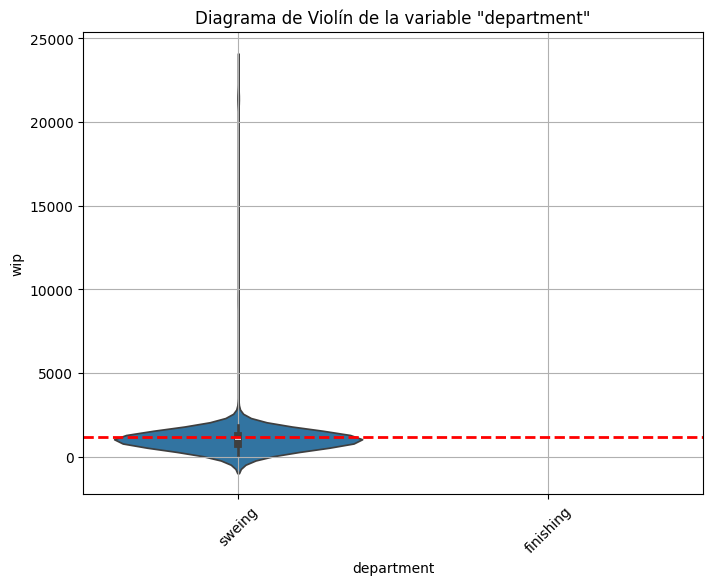

In [9]:
data_df['department'] = data_df['department'].str.strip()
# Calcular el promedio general de 'wip'
average_wip_general = data_df['wip'].mean()

# Calcular el promedio de 'wip' para cada equipo
average_wip_by_department = data_df.groupby('department')['wip'].mean()

# Calcular la diferencia porcentual y agregarla como una nueva columna
average_wip_by_department = average_wip_by_department.reset_index()
average_wip_by_department['diff_pct'] = round((average_wip_by_department['wip'] - average_wip_general) / average_wip_general * 100, 2)

print("Promedio wip: ", average_wip_general)
print("Promedio dif %: ", abs(average_wip_by_department['diff_pct']).mean())
print("Promedio Wip por department y diferencia porcentual con el promedio general:")
print(average_wip_by_department)

# Calcula el promedio de la variable Y
promedio_y = data_df['wip'].mean()


# Diagrama de Violín de la variable
plt.figure(figsize=(8, 6))
sns.violinplot(x='department', y = 'wip', data=data_df)
plt.axhline(promedio_y, color='red', linestyle='--', linewidth=2)  # Agrega la línea horizontal para el promedio
plt.title('Diagrama de Violín de la variable "department"')
plt.xlabel('department')
plt.ylabel('wip')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Promedio wip:  1190.4659913169319
Promedio dif %:  13.186666666666667
Promedio Wip por no_of_style_change y diferencia porcentual con el promedio general:
   no_of_style_change          wip  diff_pct
0                   0  1264.766544      6.24
1                   1   913.631579    -23.25
2                   2   921.969697    -22.55


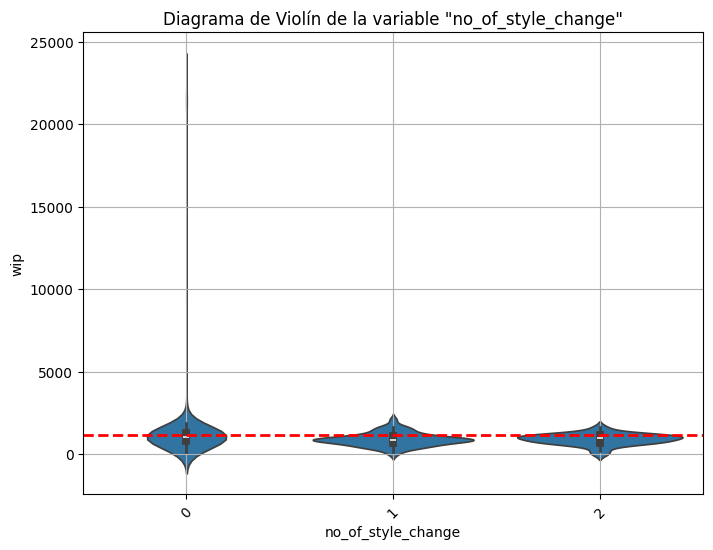

In [18]:
# Calcular el promedio general de 'wip'
average_wip_general = data_df['wip'].mean()

# Calcular el promedio de 'wip' para cada equipo
average_wip_by_no_of_style_change = data_df.groupby('no_of_style_change')['wip'].mean()

# Calcular la diferencia porcentual y agregarla como una nueva columna
average_wip_by_no_of_style_change = average_wip_by_no_of_style_change.reset_index()
average_wip_by_no_of_style_change['diff_pct'] = round((average_wip_by_no_of_style_change['wip'] - average_wip_general) / average_wip_general * 100, 2)

print("Promedio wip: ", average_wip_general)
print("Promedio dif %: ", abs(average_wip_by_no_of_style_change['diff_pct'].mean()))
print("Promedio Wip por no_of_style_change y diferencia porcentual con el promedio general:")
print(average_wip_by_no_of_style_change)

# Calcula el promedio de la variable Y
promedio_y = data_df['wip'].mean()

# Diagrama de Violín de la variable
plt.figure(figsize=(8, 6))
sns.violinplot(x='no_of_style_change', y = 'wip', data=data_df)
plt.axhline(promedio_y, color='red', linestyle='--', linewidth=2)  # Agrega la línea horizontal para el promedio
plt.title('Diagrama de Violín de la variable "no_of_style_change"')
plt.xlabel('no_of_style_change')
plt.ylabel('wip')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Observamos que, la variable 'day' muestra una gran diferencia porcentual para los proemdios del Work In Progress Vs el promedio general del Work In Progress (wip). De esta manera, para cada celda faltante se decide imputar con el  wip promedio histórico pertenenciente al día registrado para la observación.

In [19]:
# Calcular el promedio de 'wip' para cada día
average_wip_by_day = data_df.groupby('day')['wip'].transform('mean')

# Imputar los valores faltantes en 'wip' con los promedios correspondientes
data_df['wip'].fillna(average_wip_by_day, inplace=True)
data_df['wip'].isnull().sum()

0

In [20]:
data_df

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.000000,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,974.025424,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.000000,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.000000,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,Quarter2,finishing,Wednesday,10,0.75,2.90,973.773109,960,0,0.0,0,0,8.0,0.628333
1193,Quarter2,finishing,Wednesday,8,0.70,3.90,973.773109,960,0,0.0,0,0,8.0,0.625625
1194,Quarter2,finishing,Wednesday,7,0.65,3.90,973.773109,960,0,0.0,0,0,8.0,0.625625
1195,Quarter2,finishing,Wednesday,9,0.75,2.90,973.773109,1800,0,0.0,0,0,15.0,0.505889


### 2.7 Transformación Variables Dumies

In [21]:
#Corrcion variable department
data_df_modeling['department'] = data_df_modeling['department'].str.strip()

#Variables Dummies
# Copiar el DataFrame original data_df
data_df_modeling = data_df.copy()

# Obtener variables categóricas
variables_categoricas = ['quarter', 'department', 'day', 'team','no_of_style_change']

# Convertir variables categóricas en variables dummy y agregarlas al DataFrame copiado
for variable in variables_categoricas:
    dummies = pd.get_dummies(data_df_modeling[variable], prefix=variable, drop_first=True)
    data_df_modeling = pd.concat([data_df_modeling, dummies], axis=1)
    data_df_modeling.drop(variable, axis=1, inplace=True)

# Ver las primeras filas del DataFrame copiado con las variables dummy
data_df_modeling.head()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_workers,actual_productivity,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sweing,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12,no_of_style_change_1,no_of_style_change_2
0,0.80,26.16,1108.000000,7080,98,0.0,0,59.0,0.940725,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0.75,3.94,974.025424,960,0,0.0,0,8.0,0.886500,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.80,11.41,968.000000,3660,50,0.0,0,30.5,0.800570,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.80,11.41,968.000000,3660,50,0.0,0,30.5,0.800570,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.80,25.90,1170.000000,1920,50,0.0,0,56.0,0.800382,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


### 2.8 Mirando nuevamente las correlaciones

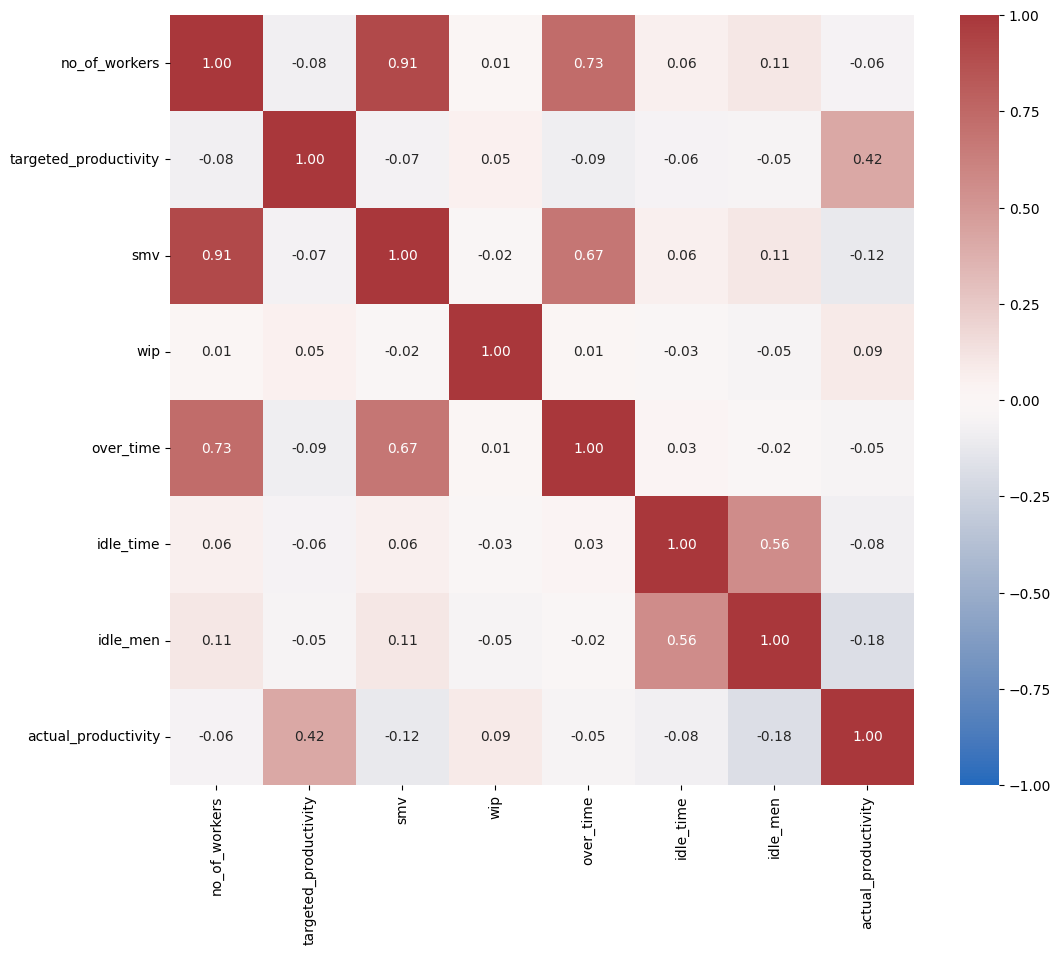

In [23]:
features_numericas= ['no_of_workers', 'targeted_productivity', 'smv', 'wip', 'over_time', 'idle_time', 'idle_men', 'actual_productivity']
correlation_matrix = data_df_modeling[features_numericas].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='vlag', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

## 2.9 Archivo Resultante

In [24]:
data_df_modeling.to_csv('clean_data.txt')